# Align images

### Following this tutorial:

https://scikit-image.org/docs/dev/auto_examples/transform/plot_geometric.html#sphx-glr-auto-examples-transform-plot-geometric-py


In [1]:
#load packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from skimage import data
from skimage import transform

import tifffile as tiff

In [101]:
#load the two images into numpy arrays
path_img1='/groups/zimmer/Ulises/code/imutils/imutils/test_images/Result of 2021-03-04_16-17-30_worm3_ZIM2051-channel-0-bigtiff_volume_537.tif'
img1=tiff.imread(path_img1)
path_img2='/groups/zimmer/Ulises/code/imutils/imutils/test_images/MAX_2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1bigtiff-1.tif'
img2=tiff.imread(path_img2)

In [102]:
#print shapes
print('image 1 shape is: ', img1.shape)
print('image 2 shape is: ', img2.shape)

image 1 shape is:  (800, 800)
image 2 shape is:  (700, 900)


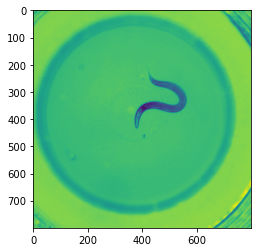

In [103]:
#plot image 1 to crop only ROI
plt.imshow(img1)

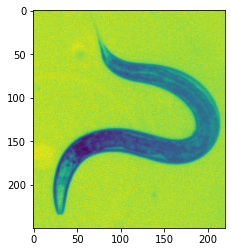

In [182]:
#crop
img1_c=img1[200:450,350:570]
plt.imshow(img1_c)

In [105]:
#Upscale image 1 (BH) which has lower pixel resolution

In [183]:
#calculate scale ratios
##pixel size in um
img1_px_size=0.325
img2_px_size=2.4
scale=img2_px_size/img1_px_size
print('scale is :', scale)


#specify rotation
rotation=0#np.pi/12

#specify translation
translation=0

tform = transform.SimilarityTransform(
    scale=scale,
    rotation=rotation,
    translation=translation)

scale is : 7.384615384615384


In [184]:
#calculate output_shape based on the scale and the crop dimensions
output_shape=tuple([(scale)*x for x in img1_c.shape])


In [185]:
#convert it into integers with math.ceil function
output_shape=tuple([math.ceil(x) for x in output_shape])
print(output_shape)

(1847, 1625)


In [186]:
#plot transformation parameters and apply transformation
print(tform.params)
tf_img1 = transform.warp(img1_c, tform.inverse, output_shape=output_shape)

[[ 7.38461538 -0.          0.        ]
 [ 0.          7.38461538  0.        ]
 [ 0.          0.          1.        ]]


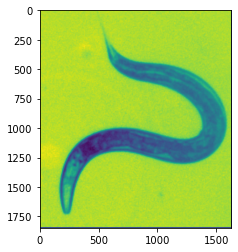

In [189]:
### plot img1 upscaled
plt.imshow(tf_img1)

Text(0.5, 1.0, 'Similarity transformation')

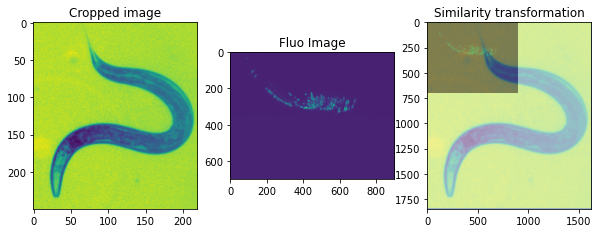

In [192]:
fig, ax = plt.subplots(figsize=(10,10),ncols=3)
ax[0].imshow(img1_c)
ax[0].set_title('Cropped image')
ax[1].imshow(img2)
ax[1].set_title('Fluo Image')

ax[2].imshow(img2)
ax[2].imshow(tf_img1, alpha=0.5)
ax[2].set_title('Similarity transformation')

In [193]:
#now transform img2 (rotate and translate)

#scale2
scale2=1 #we don't scale it because we previously scaled the bh image. We dont want to downscale this now.

#rotation2
rotation2=np.pi/1.7#1.65
print(rotation2)
print(np.rad2deg(rotation2))

#translation2
translation2=(680,1000)

#transformation2
tform2 = transform.SimilarityTransform(
    scale=scale2,
    rotation=rotation2,
    translation=translation2)

1.8479956785822313
105.88235294117648


In [196]:
print(tform2.params)

tf_img2 = transform.warp(img2, tform2.inverse, output_shape=tf_img1.shape)

[[-2.73662990e-01 -9.61825643e-01  6.80000000e+02]
 [ 9.61825643e-01 -2.73662990e-01  1.00000000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


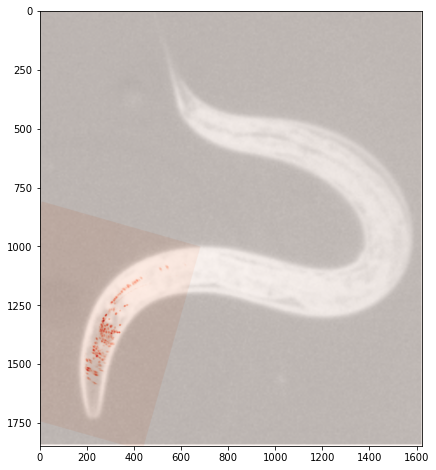

In [197]:
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(tf_img2, cmap='Reds')
ax.imshow(tf_img1, cmap='Greys', alpha=0.3)

## Trying now only transforming the Fluorescent image
The Fluorescent image will be downscaled so it will loose resolution

In [1]:
#load packages
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

import tifffile as tiff

In [4]:
#load the two images into numpy arrays
path_img1='/groups/zimmer/Ulises/code/imutils/imutils/test_images/Result of 2021-03-04_16-17-30_worm3_ZIM2051-channel-0-bigtiff_volume_537.tif'
img1=tiff.imread(path_img1)
path_img2='/groups/zimmer/Ulises/code/imutils/imutils/test_images/MAX_2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1bigtiff-1.tif'
img2=tiff.imread(path_img2)

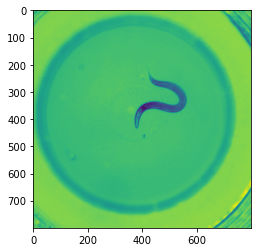

In [3]:
plt.imshow(img1)

In [375]:
#now transform img2 (rotate and translate)

#scale2
scale2=1/7.384615384615384

#rotation2
rotation2=np.pi/1.85
print(rotation2)
print(np.rad2deg(rotation2))

#translation2
translation2=(430,330)#(680,1000)

#transformation2
tform2 = transform.SimilarityTransform(
    scale=scale2,
    rotation=rotation2,
    translation=translation2)
print(tform2)
print(tform2.params)

1.6981581911296177
97.29729729729729
<SimilarityTransform(matrix=
    [[-1.72003298e-02, -1.34319851e-01,  4.30000000e+02],
     [ 1.34319851e-01, -1.72003298e-02,  3.30000000e+02],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])>
[[-1.72003298e-02 -1.34319851e-01  4.30000000e+02]
 [ 1.34319851e-01 -1.72003298e-02  3.30000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [6]:
print(tform2.params)
tf_img2 = transform.warp(img2, tform2.inverse, output_shape=img1.shape)

[[-1.72003298e-02 -1.34319851e-01  4.30000000e+02]
 [ 1.34319851e-01 -1.72003298e-02  3.30000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


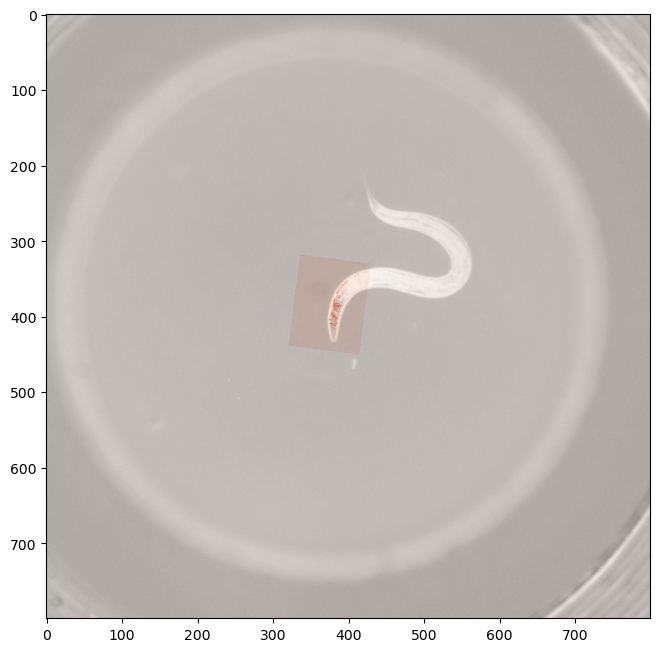

In [10]:
#plotting only the merge
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
ax.imshow(tf_img2, cmap='Reds')
ax.imshow(img1, cmap='Greys', alpha=0.4)

Text(0.5, 1.0, 'Merged')

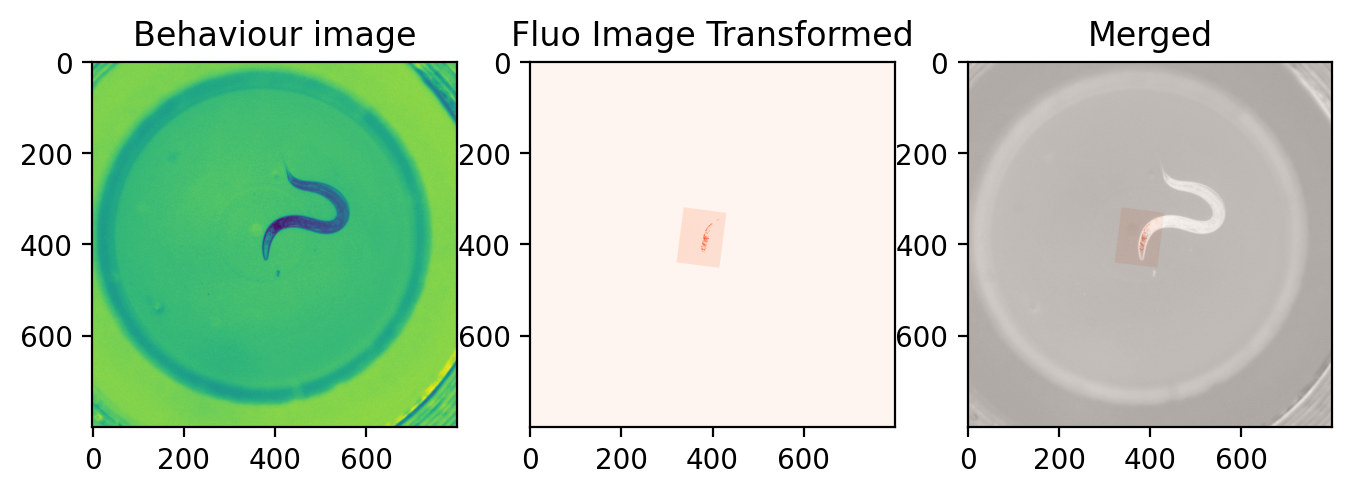

In [13]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200, ncols=3)

ax[0].imshow(img1)
ax[1].imshow(tf_img2, cmap='Reds')
ax[2].imshow(tf_img2, cmap='Reds')
ax[2].imshow(img1, cmap='Greys', alpha=0.4)

ax[0].set_title('Behaviour image')
ax[1].set_title('Fluo Image Transformed')
ax[2].set_title('Merged')

## For Daniel Project in ZIM06 recordings
This file is to do image transformation
It is thought to be used ofr Daniel project and plot the food border recorded on BH station on top of the ZIM06 Bh recording or the trajectories

In [11]:
#load packages
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

import tifffile as tiff
import os

In [3]:
#load the two images into numpy arrays

exp_folder='/Users/ulises.rey/local_data/Daniel_ZIM06_Alignment/recording_1_2021-12-30_04-00_op_50_gfp_5_beads_reached_ref/'
#img1 is recording from BH setup
path_img1='behavior_setup_after/2021-12-30_13-33-43_recording_1_after_MMStack.ome.tif'

img1_path=os.path.join(exp_folder,path_img1)
print(os.path.exists(img1_path))

img1=tiff.imread(img1_path)

#img2 is now beh from ZIM06
path_img2='behavior_channel/2021-12-30_04-00-18_recording1_gfp_bacteria-channel-0-behaviour-bigtiff.btf'
#path_img2='2021-12-22_07-32-08_recording_3-channel-0-behaviour-/2021-12-22_07-32-08_recording_3-channel-0-behaviour-bigtiff_100subsample.tif'
img2=tiff.imread(os.path.join(exp_folder,path_img2))

True


In [4]:
img1=img1[0]
img2=img2[0]

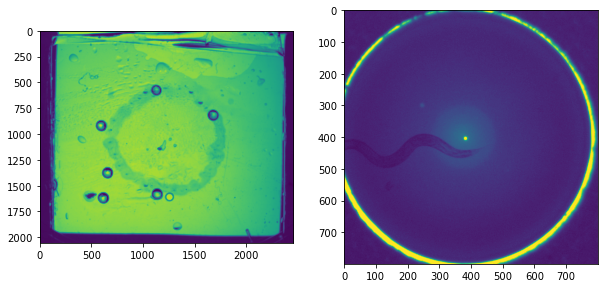

In [5]:
%matplotlib inline
fig, ax = plt.subplots(ncols=2, figsize=(10,10))
ax[0].imshow(img1)
ax[1].imshow(img2)

In [6]:
#calculate scale
##pixel size in um
img1_px_size=0.325
img2_px_size=2.4
scale=img2_px_size/img1_px_size
print('scale is :', scale)

scale is : 7.384615384615384


In [98]:
#now transform img2 (rotate and translate)

#scale2 (inverted of scale1)
scale2=1/scale

#rotation2
rotation2=np.pi/1.85
print(rotation2)
print(np.rad2deg(rotation2))

#translation2
translation2=(430,330)#(680,1000)

#transformation2
tform2 = transform.SimilarityTransform(
    scale=scale2,
    rotation=rotation2,
    translation=translation2)

1.6981581911296177
97.29729729729729


In [99]:
print(tform2.params)
tf_img2 = transform.warp(img2, tform2.inverse, output_shape=img1.shape)

[[-1.72003298e-02 -1.34319851e-01  4.30000000e+02]
 [ 1.34319851e-01 -1.72003298e-02  3.30000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


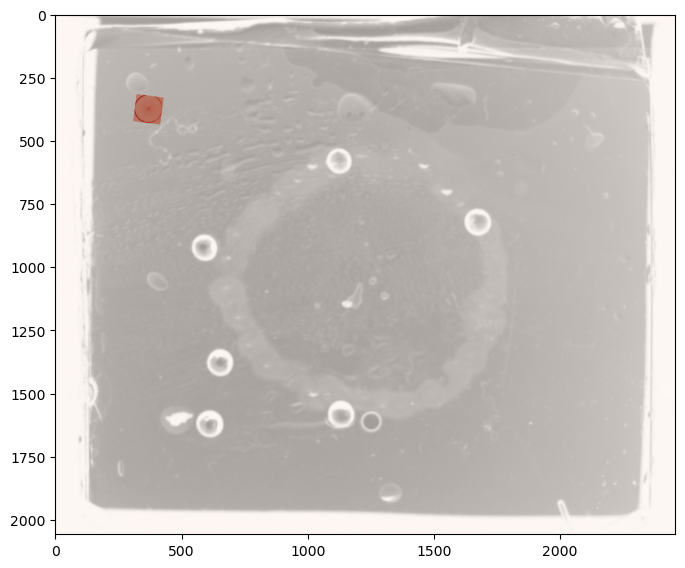

In [100]:
#plotting only the merge
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
ax.imshow(tf_img2, cmap='Reds')
ax.imshow(img1, cmap='Greys', alpha=0.4)

Text(0.5, 1.0, 'Merged')

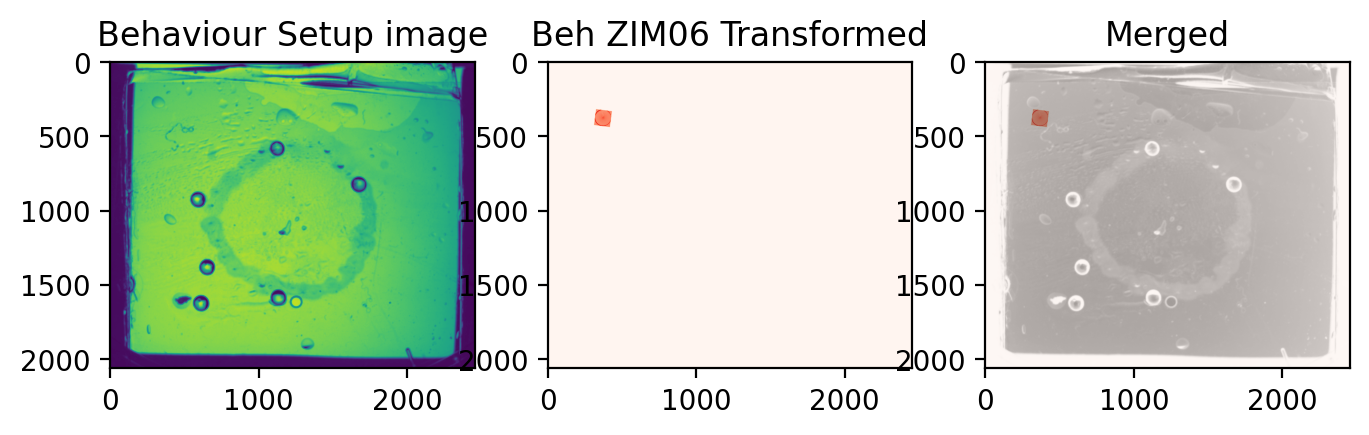

In [101]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200, ncols=3)

ax[0].imshow(img1)
ax[1].imshow(tf_img2, cmap='Reds')
ax[2].imshow(tf_img2, cmap='Reds')
ax[2].imshow(img1, cmap='Greys', alpha=0.4)

ax[0].set_title('Behaviour Setup image')
ax[1].set_title('Beh ZIM06 Transformed')
ax[2].set_title('Merged')

In [ ]:
# Estimating from source and dest (calculated in cells below)

In [428]:
tform3 = transform.AffineTransform()
tform3 = transform.SimilarityTransform()

In [425]:
tform3.estimate(src, dst)

True

In [426]:
print(tform2.params)
tf_img2 = transform.warp(img2, tform3)

[[-1.72003298e-02 -1.34319851e-01  4.30000000e+02]
 [ 1.34319851e-01 -1.72003298e-02  3.30000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


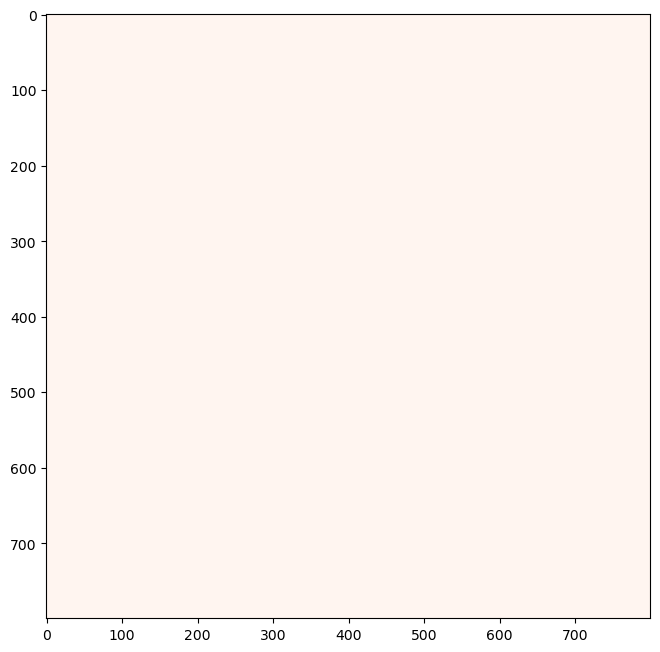

In [427]:
#plotting only the merge
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
ax.imshow(tf_img2, cmap='Reds')
#ax.imshow(img1, cmap='Greys', alpha=0.4)

# Using coordinate references
See https://scikit-image.org/docs/stable/user_guide/geometrical_transform.html

In [431]:
text = data.text()

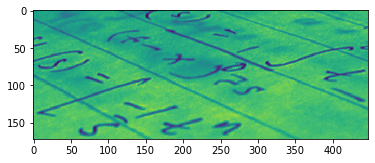

In [432]:
plt.imshow(text)

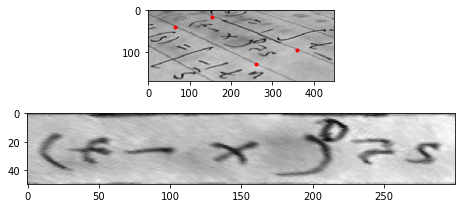

In [433]:
src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = transform.ProjectiveTransform()
tform3.estimate(src, dst)
warped = transform.warp(text, tform3, output_shape=(50, 300))

fig, ax = plt.subplots(nrows=2, figsize=(8, 3))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

# for a in ax:
#     a.axis('off')

plt.tight_layout()
plt.show()

# Using coordinate references on Daniel data

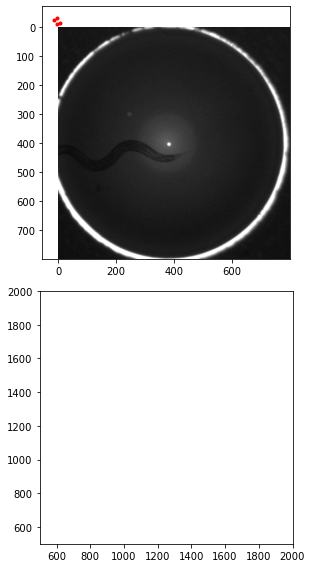

In [7]:
# DOES NOT MAKE SENSE BECAUSE WE NEED TO TAKE INTO ACCOUNT THE COORDINATES OF THE WORM ON THE BH RECORDING
#BH setup coords
src= np.array([[651, 1386], [1131, 1587], [1677, 822], [1131,585]])
#Stage position Coords
dst = np.array([[6.88, -15.16], [-2.6, -10.24], [-13.53, -25.75], [-2.93, -31.01]])


tform3 = transform.ProjectiveTransform()
tform3.estimate(src, dst)
warped = transform.warp(img2, tform3, output_shape=(50, 300))

fig, ax = plt.subplots(nrows=2, figsize=(8, 8))

ax[0].imshow(img2, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

# for a in ax:
#     a.axis('off')
ax[1].set_xlim([500, 2000])
ax[1].set_ylim([500, 2000])
plt.tight_layout()
plt.show()

In [455]:
# read stage position

In [8]:
stage_coords=pd.read_csv(os.path.join(exp_folder,'2021-12-30_04-00_recording1_gfp_bacteria-TablePosRecord.txt'))

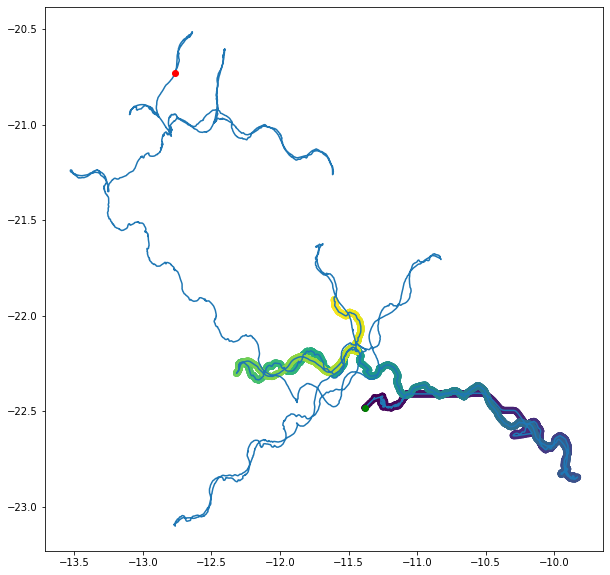

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(stage_coords['X'], stage_coords['Y'])

#scatter a fragment of frames
frames=5000
ax.scatter(stage_coords.loc[0:frames,'X'], stage_coords.loc[0:frames,'Y'], c=stage_coords.index[0:frames+1])
ax.plot(stage_coords.loc[0,'X'], stage_coords.loc[0,'Y'], 'go')
ax.plot(stage_coords['X'].tail(1), stage_coords['Y'].tail(1), 'ro')

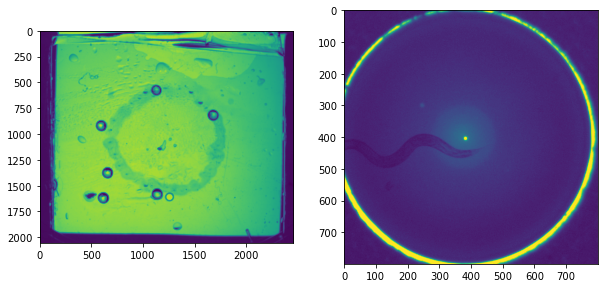

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(10,10))
ax[0].imshow(img1)
ax[1].imshow(img2)

## After Lukas, attempt to calculate matrix with opencv or scikit image


In [217]:
src_h_mirr,dst

(array([[1801.5, 1381.5],
        [1843.5, 1627.5],
        [1321.5, 1585.5],
        [ 781.5,  823.5],
        [1327.5,  580.5]]),
 array([[  6.88, -15.16],
        [  7.81, -10.23],
        [ -2.6 , -10.24],
        [-13.53, -25.75],
        [ -2.93, -31.01]]))

In [102]:
results=transform.estimate_transform('euclidean', src_h_mirr, dst)

In [103]:
results.params

array([[ 9.99744622e-01,  2.25984581e-02, -1.44272399e+03],
       [-2.25984581e-02,  9.99744622e-01, -1.18589255e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [218]:
coord = [ 651, 1386]
print(results(coord))


[[-760.56877311  185.04190496]]


In [219]:
results(pts) #WHY DOES IT FAIL?! Probably because of the format?

array([[ 389.53572172,  154.54352811],
       [ 437.08421654,  399.53156994],
       [ -85.73161151,  369.33869094],
       [-642.81373259, -380.26354383],
       [-102.44459417, -635.54024516]])

### Trying with openCV


In [112]:
import cv2

In [220]:
src_pts=src_h_mirr
print(src_pts)
dst_pts=dst
print(dst_pts)

[[1801.5 1381.5]
 [1843.5 1627.5]
 [1321.5 1585.5]
 [ 781.5  823.5]
 [1327.5  580.5]]
[[  6.88 -15.16]
 [  7.81 -10.23]
 [ -2.6  -10.24]
 [-13.53 -25.75]
 [ -2.93 -31.01]]


In [221]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
M

array([[ 1.94444836e-02,  5.59043013e-04, -2.90534391e+01],
       [-1.65310630e-03,  2.13713979e-02, -4.16790450e+01],
       [ 3.07644548e-05, -4.53250670e-05,  1.00000000e+00]])

In [223]:
pts=np.array([[[1801.5, 1381.5]],
    [[1843.5, 1627.5]],
    [[1321.5, 1585.5]],
    [[ 781.5, 823.5]],
    [[1327.5, 580.5]]])

In [224]:
dst_result = cv2.perspectiveTransform(pts,M)
dst_result

array([[[  6.79701649, -15.24218847]],

       [[  7.83592924, -10.11711627]],

       [[ -2.55079578, -10.30073558]],

       [[-13.5775508 , -25.71314322]],

       [[ -2.87459879, -31.01681585]]])

In [225]:
src_rs=np.float32(np.reshape(src_h_mirr, (5,1,2)))

In [226]:
dst_result = cv2.perspectiveTransform(src_rs,M)
dst_result

array([[[  6.7970166, -15.242188 ]],

       [[  7.8359294, -10.117116 ]],

       [[ -2.5507958, -10.300735 ]],

       [[-13.577551 , -25.713142 ]],

       [[ -2.8745987, -31.016815 ]]], dtype=float32)

In [204]:
# It worked, now try with the polygon_mirror
polygon_h_mirr_pts=np.float32(np.reshape(polygon_h_mirr,(28,1,2))) #polygon_h_mirr[0], 1, polygon_h_mirr[1]))

In [207]:
opencv_solution=cv2.perspectiveTransform(polygon_h_mirr_pts,M)

In [210]:
opencv_solution.shape

(28, 1, 2)

Text(0.5, 1.0, 'It works!')

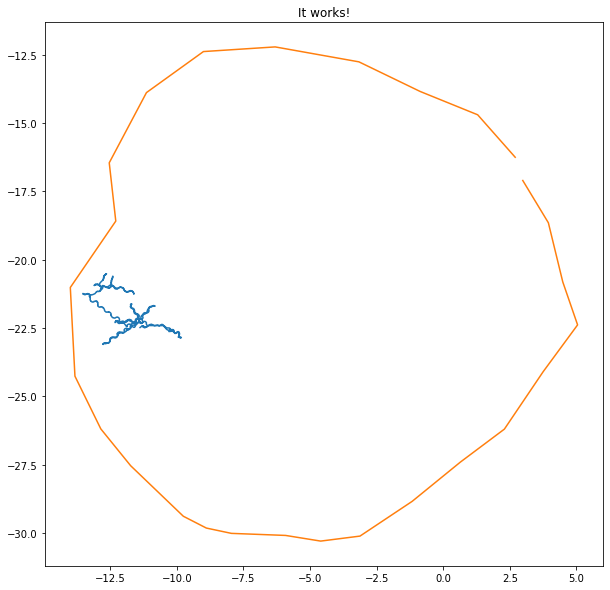

In [227]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(stage_coords['X'], stage_coords['Y'])
ax.plot(opencv_solution[:,0,0],opencv_solution[:,0,1])
ax.set_title('It works!')

In [458]:
# calculate scale
##pixel size in mm
img1_px_size=40/2000 #40mm/2000px
img2_px_size=1 #rela units mm from stage position
scale=img2_px_size/img1_px_size
print('scale is :', scale)

scale is : 50.0


Text(0.5, 1.0, 'Manual Approximation, not real')

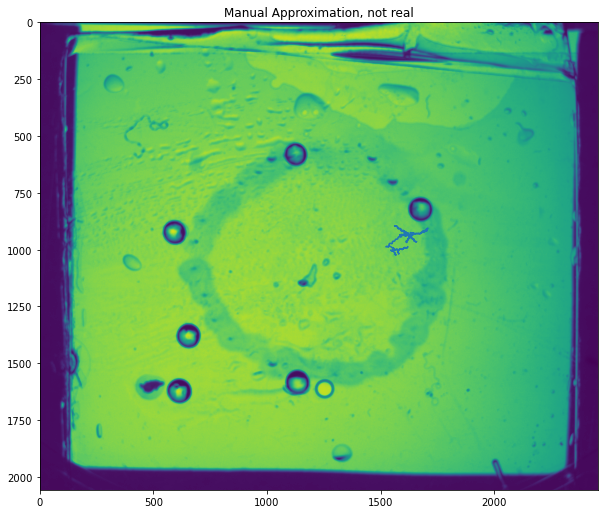

In [462]:
#this is an approximation on how it could look like, but is not right
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img1)
ax.plot(stage_coords['X']*scale+2200, stage_coords['Y']*scale+2050)#2000 3050
ax.set_title('Manual Approximation, not real')


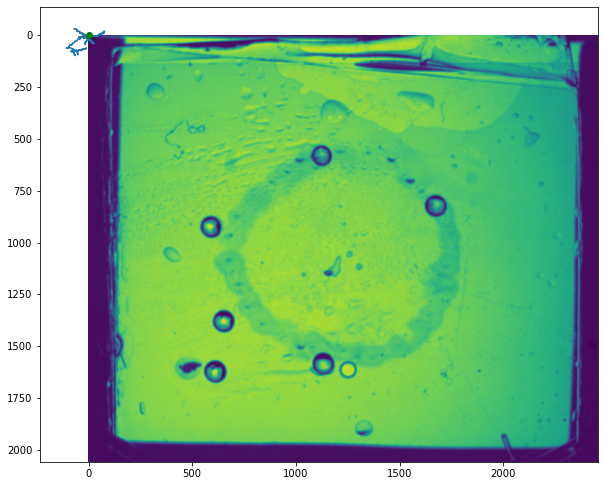

In [463]:
# This is substracting the initial coordinates
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img1)
ax.plot(stage_coords['X']*scale+11.38*scale, stage_coords['Y']*scale+22.48*scale) #2000 3050
plt.plot(stage_coords.loc[0,'X']*scale+11.38*scale, stage_coords.loc[0,'Y']*scale+22.48*scale, 'go')


# read beads coordinates

In [153]:
# from BH setup
bh_coords_path=os.path.join(exp_folder, 'bead_position_after.csv')
bh_coords=pd.read_csv(bh_coords_path)
bh_coords

id  bead1x  bead1y  bead2x  bead2y  bead3x  bead3y  bead4x  \
0  2021-12-3004-00     651    1386     615    1626    1131    1587    1677   

   bead4y  bead5x  bead5y  
0     822    1131     585

In [154]:
# from ZIM06
zim6_coords_path=os.path.join(exp_folder, 'zim06_bead_position_copy.csv')
zim6_coords=pd.read_csv(zim6_coords_path)
zim6_coords

id_zim6  bead1x  bead1y  bead2x  bead2y  bead3x  bead3y  bead4x  \
0  2021-12-30_04-00    6.88  -15.16    7.81  -10.23    -2.6  -10.24  -13.53   

   bead4y  bead5x  bead5y  
0  -25.75   -2.93  -31.01

In [160]:
#Manually copied them into an array
#BH setup coords
src = np.array([[651, 1386], [615, 1626], [1131, 1587], [1677, 822], [1131,585]])
print('src\n', src)
#Stage position Coords
dst = np.array([[6.88, -15.16], [7.81, -10.23], [-2.6, -10.24], [-13.53, -25.75], [-2.93, -31.01]])
print('dst\n', dst)

src
 [[ 651 1386]
 [ 615 1626]
 [1131 1587]
 [1677  822]
 [1131  585]]
dst
 [[  6.88 -15.16]
 [  7.81 -10.23]
 [ -2.6  -10.24]
 [-13.53 -25.75]
 [ -2.93 -31.01]]


In [708]:
#trying solve but it does not work. It says that src should be square but I do not understand why
a_sol=np.linalg.solve(src, dst)

LinAlgError: Last 2 dimensions of the array must be square

In [1002]:
a=np.linalg.lstsq(src, dst)

<ipython-input-1002-c90d094e281e>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a=np.linalg.lstsq(src, dst)


In [1018]:
a=np.linalg.lstsq(src_h_mirr, dst)

<ipython-input-1018-4649c2cbd5b4>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a=np.linalg.lstsq(src_h_mirr, dst)


In [1021]:
src_h_mirr

array([[1801.5, 1381.5],
       [1843.5, 1627.5],
       [1321.5, 1585.5],
       [ 781.5,  823.5],
       [1327.5,  580.5]])

In [1019]:
#contains the transformation matrix
print(a[0])
print(a[0].shape)

[[ 0.00406903 -0.02329319]
 [-0.00387878  0.01441567]]
(2, 2)


In [1023]:
a[1]

array([290.91590726, 586.90490258])

In [627]:
xvals = polygon2[:,0]
yvals = polygon2[:,1]
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])

In [1010]:
polygon2[0]

array([1107.5,  651.5])

In [1011]:
a[0]

array([[-0.01109058, -0.01895688],
       [ 0.00850511,  0.00192034]])

In [1022]:
np.matmul(a[0],dst[0])

array([ 0.38111969, -0.24522763])

In [1016]:
np.matmul(a[0],polygon2[0])

array([-24.6332264 ,  10.67050947])

In [1012]:
a[0]*polygon2[0]

array([[-12.28281786, -12.35040854],
       [  9.41940476,   1.25110471]])

In [684]:
sol=np.dot(a[0],polygon2.T)

In [696]:
p1=np.array([651, 1386])

In [700]:
p1_sol=np.dot(a[0],p1.T)
p1_sol

array([-33.49420616,   8.19842198])

In [642]:
sol.shape

(2, 58)

(-45.85897680180989, -23.52463907972899, 7.618937929226802, 16.861981257591676)

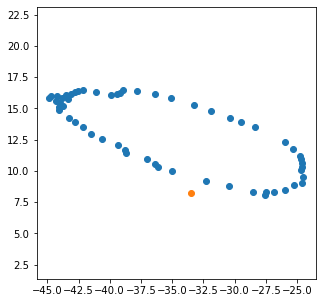

In [701]:
fig, ax =plt.subplots(figsize=(5,5))
ax.scatter(sol[0], sol[1])
ax.scatter(p1_sol[0], p1_sol[1])
ax.axis('equal')

In [635]:
polygon2[:,0].shape

(58,)

In [633]:
sol.shape

(2, 3364)

In [ ]:
# Manually solving the matirx multiplication

In [771]:
a=-0.001755
b=0.00413954864749
c=-0.0507
d=0.029219059262
transformation_matrix=[[a, b],
 [c,  d]]
transformation_matrix

[[-0.001755, 0.00413954864749], [-0.0507, 0.029219059262]]

In [715]:
sol3=np.dot(transformation_matrix, src.T)

In [754]:
sol3_p=np.dot(transformation_matrix,polygon2.T)

In [773]:
sol3_point1=np.dot(transformation_matrix,[651,1386])
sol3_point1

array([4.59490943, 7.49191614])

In [772]:
for src_coord in src:
    sol3_point1=np.dot(transformation_matrix,src_coord)
    print(src_coord, sol3_point1)

[ 651 1386] [4.59490943 7.49191614]
[ 615 1626] [ 5.6515811  16.32969036]
[1131 1587] [  4.5845587  -10.97105295]
[1677  822] [  0.45957399 -61.00583329]
[1131  585] [  0.43673096 -40.24855033]


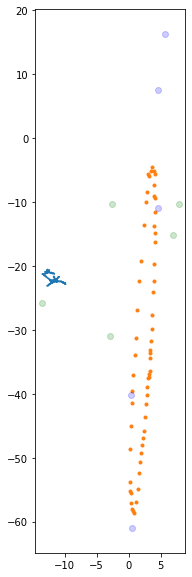

In [750]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(stage_coords['X'], stage_coords['Y'])
ax.plot(sol3_p[0],sol3_p[1], '.')
ax.plot(sol3[0],sol3[1], 'ob', alpha=.2)
ax.plot(dst[:,0],dst[:,1], 'og', alpha=.2)
ax.set_aspect('equal')

# trying to solve it with src_mirr
The idea is that maybe because of the mirroring it can't be solved with a linear transformation(?)


In [816]:
src_mirr=np.array([[1800.0,676.0],
[1839.5,435.5],
[1315.5,471.5],
[779.5,1235.5],
[1331.5,1479.5]])

In [156]:
src_h_mirr=np.array([[1801.5,1381.5],
[1843.5,1627.5],
[1321.5,1585.5],
[781.50,823.5],
[1327.5,580.5]])

In [986]:
a_mirr=np.linalg.lstsq(src_h_mirr, dst)

<ipython-input-986-975733987d0b>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a_mirr=np.linalg.lstsq(src_h_mirr, dst)


In [969]:
print(a_mirr[0])
print('residual: ' ,a_mirr[1])

[[ 0.00406903 -0.02329319]
 [-0.00387878  0.01441567]]
residual:  [290.91590726 586.90490258]


In [917]:
dst_sol_mirr=np.dot(a_mirr[0],src_h_mirr.T)
print(dst)
print(dst_sol_mirr)

[[  6.88 -15.16]
 [  7.81 -10.23]
 [ -2.6  -10.24]
 [-13.53 -25.75]
 [ -2.93 -31.01]]
[[-24.84917305 -30.40839789 -31.55412023 -16.00198968  -8.12005185]
 [ 12.9276236   16.31097019  17.73023686   8.84003727   3.21921308]]


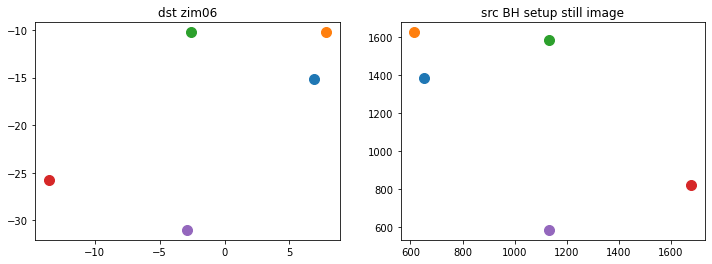

In [1026]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))

for (x,y) in dst:
    ax1.scatter(x, y, s=100)
    ax1.set_title('dst zim06')
for (x,y) in src:
    ax2.scatter(x, y, s=100)
    ax2.set_title('src BH setup still image')
# for (x,y) in src_h_mirr:
#     ax3.scatter(x, y, s=100)
#     ax3.set_title('src_horizontal_mirror')
# for (x,y) in src_mirr:
#     ax4.scatter(x, y, s=100)
#     ax4.set_title('src_double_mirror')

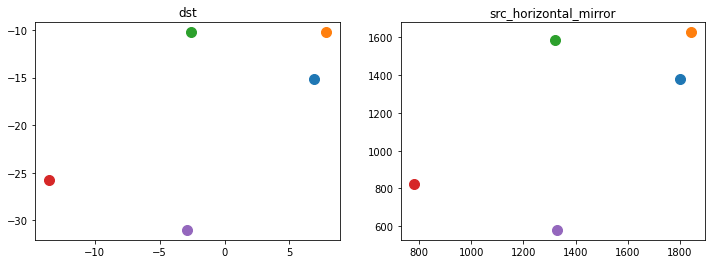

In [972]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))

for (x,y) in dst:
    ax1.scatter(x, y, s=100)
    ax1.set_title('dst')

for (x,y) in src_h_mirr:
    ax2.scatter(x, y, s=100)
    ax2.set_title('src_horizontal_mirror')

# Manually with Lukas

In [988]:
dst

array([[  6.88, -15.16],
       [  7.81, -10.23],
       [ -2.6 , -10.24],
       [-13.53, -25.75],
       [ -2.93, -31.01]])

In [86]:
src_h_mirr

NameError: name 'src_h_mirr' is not defined

In [89]:
offset = [-30, -42]
#mm/px
scale = 40/2000

In [94]:
src_h_mirr_scaled=src_h_mirr*scale
src_h_mirr_scaled

array([[36.03, 27.63],
       [36.87, 32.55],
       [26.43, 31.71],
       [15.63, 16.47],
       [26.55, 11.61]])

In [91]:
lukas_solution = src_h_mirr_scaled[0]+offset
lukas_solution

array([  6.03, -14.37])

[  6.03 -14.37]
[ 6.87 -9.45]
[ -3.57 -10.29]
[-14.37 -25.53]
[ -3.45 -30.39]


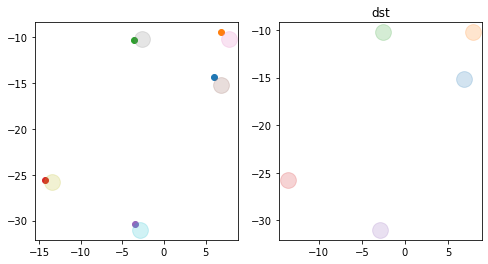

In [100]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8,4))
for mirr_cords in src_h_mirr_scaled:
    lukas_solution = mirr_cords+offset
    print(lukas_solution)
    ax1.scatter(lukas_solution[0],lukas_solution[1])
for (x,y) in dst:
    ax1.scatter(x, y, s=250, alpha=.2)
    #ax2.set_title('dst')
    ax2.scatter(x, y, s=250, alpha=.2)
    ax2.set_title('dst')

In [ ]:
# end of lukas

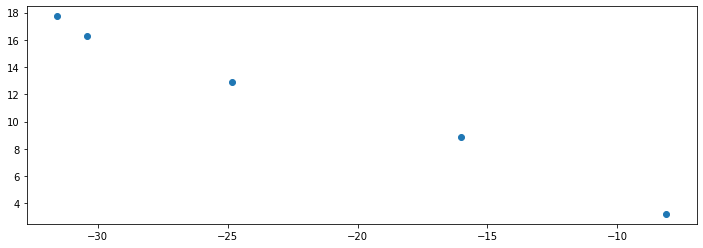

In [971]:
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.scatter(dst_sol_mirr[0],dst_sol_mirr[1])

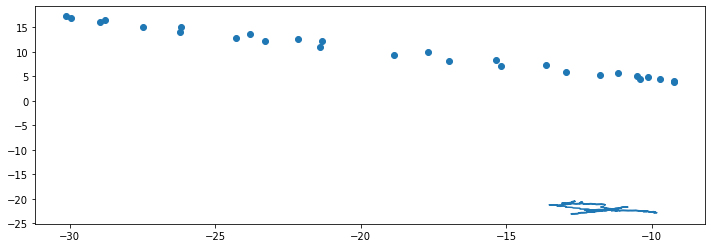

In [973]:
polygon2_sol_mirr=np.dot(a_mirr[0],polygon_h_mirr.T)
# print(dst)
# print(polygon2_sol_mirr)
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.scatter(polygon2_sol_mirr[0],polygon2_sol_mirr[1])
ax1.plot(stage_coords['X'], stage_coords['Y'])

In [922]:
# Solve equations
# https://www.statology.org/solve-system-of-equations-in-python/

In [976]:
# a and b
left_side = np.array([[1801, 1381], [1843, 1627]])

#define right-hand side of equation
right_side = np.array([6.88, 7.81])

#solve for x and y
the_solution=np.linalg.inv(left_side).dot(right_side)
the_solution

array([0.00106001, 0.00359951])

In [977]:
# c and d with same points
left_side = np.array([[1801, 1381], [1843, 1627]])

#define right-hand side of equation
right_side = np.array([-15.16, -10.23])

#solve for x and y
the_solution=np.linalg.inv(left_side).dot(right_side)
the_solution

array([-0.0273675 ,  0.02471315])

In [946]:
# c and d
left_side = np.array([[1321, 1585], [781, 823]])

#define right-hand side of equation
right_side = np.array([-10.24, -25.8])

#solve for x and y
the_solution=np.linalg.inv(left_side).dot(right_side)
the_solution

array([-0.21542833,  0.17308569])

In [978]:
# Manual solution mirrored (the solution i found is not correct)
a=0.00106001
b=0.00359951
c=-0.0273675
d=0.02471315
transformation_matrix=[[a, b],
 [c,  d]]
transformation_matrix

[[0.00106001, 0.00359951], [-0.0273675, 0.02471315]]

In [979]:
solution_point1=np.dot(transformation_matrix,[1801,1381])
solution_point1

array([  6.88000132, -15.16000735])

In [980]:
solution_point2=np.dot(transformation_matrix,[1843,1627])
solution_point2

array([  7.8100012 , -10.23000745])

In [981]:
solution_point3=np.dot(transformation_matrix,[1321,1585])
solution_point3

array([7.10549656, 3.01787525])

In [982]:
solution_h_mirr=np.dot(transformation_matrix,src_h_mirr.T)
solution_h_mirr

array([[  6.88233108,   7.81233096,   7.10782632,   3.7925943 ,
          3.49667883],
       [-15.16133453, -10.23133462,   3.01654808,  -1.03642222,
        -21.98437268]])

In [983]:
for point in src_h_mirr:
    print(point)

[1801.5 1381.5]
[1843.5 1627.5]
[1321.5 1585.5]
[781.5 823.5]
[1327.5  580.5]


In [198]:
polygon_h_mirr=np.array([[1593.5,1321.5],
[1519.5,1391.5],
[1409.5,1425.5],
[1293.5,1469.5],
[1137.5,1485.5],
[1005.5,1469.5],
[901.5,1393.5],
[833.5,1269.5],
[845.5,1169.5],
[789.5,1089.5],
[761.5,1049.5],
[769.5,893.5],
[817.5,801.5],
[873.5,737.5],
[973.5,649.5],
[1017.5,629.5],
[1065.5,621.5],
[1169.5,621.5],
[1237.5,613.5],
[1313.5,625.5],
[1413.5,693.5],
[1505.5,769.5],
[1589.5,833.5],
[1661.5,941.5],
[1725.5,1029.5],
[1693.5,1105.5],
[1661.5,1209.5],
[1609.5,1281.5]])

In [984]:
solution_polygon_mirr=np.dot(transformation_matrix,polygon_h_mirr.T)
solution_polygon_mirr

array([[  6.4458784 ,   6.61940336,   6.6251856 ,   6.66060288,
          6.55283348,   6.35532   ,   5.9715162 ,   5.45309628,
          5.1058654 ,   4.75854404,   4.58488336,   4.03183988,
          3.75156544,   3.58055736,   3.36980148,   3.34445172,
          3.36653612,   3.47677716,   3.52006176,   3.64381664,
          3.99458432,   4.365668  ,   4.68507748,   5.15014528,
          5.5347428 ,   5.77438524,   6.11481396,   6.31885816],
       [-10.95168352,  -7.19656802,  -3.34589593,   0.91611267,
          5.58085307,   8.79795267,   9.76597328,   8.56253267,
          5.76280768,   5.31833568,   5.09609967,   1.02190827,
         -2.56534153,  -5.67956313, -10.59107033, -12.28950332,
        -13.80084852, -16.64706852, -18.70576372, -20.48913593,
        -21.54539172, -22.18500232, -22.90223073, -22.20367052,
        -21.78043332, -19.02647392, -15.58054632, -12.37808953]])

Text(0.5, 1.0, 'sol dst')

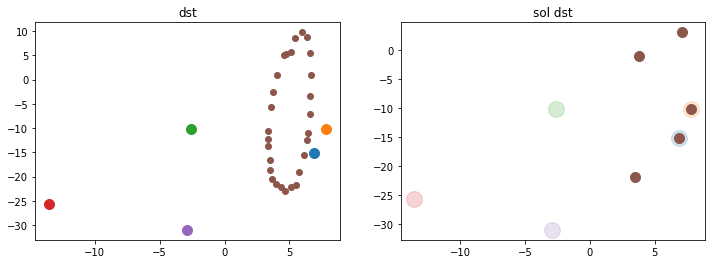

In [985]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))

for (x,y) in dst:
    ax1.scatter(x, y, s=100)
    ax1.set_title('dst')
ax1.scatter(solution_polygon_mirr[0],solution_polygon_mirr[1])

for (x,y) in dst:
    ax2.scatter(x, y, s=250, alpha=.2)
    ax2.set_title('dst')
ax2.scatter(solution_h_mirr[0], solution_h_mirr[1], s=100)
ax2.set_title('sol dst')

In [472]:
# Rescaling the BH image to closer to real units
scale2=50

In [473]:
img1_rescaled= transform.rescale(img1, 1/scale2, anti_aliasing=True)

Text(0, 0.5, 'mm')

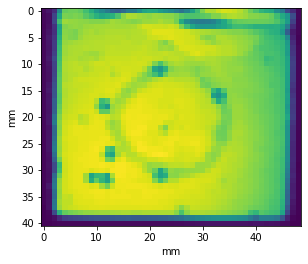

In [476]:
plt.imshow(img1_rescaled)
plt.xlabel('mm')
plt.ylabel('mm')

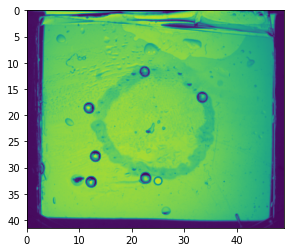

In [481]:
#changing the exntent to show the image with mm in axes (aprox) instead of px
plt.imshow(img1,extent=[0,49,41.5,0])

In [502]:
tform3 = transform.SimilarityTransform()
tform3.estimate(src, dst)
tform3.params


array([[ 1.62188277e-03,  1.23939865e-02, -1.74500365e+01],
       [-1.23939865e-02,  1.62188277e-03, -7.52406568e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [506]:
tform3 = transform.ProjectiveTransform()
tform3.estimate(src, dst)
tform3.params


array([[-1.97197110e-02,  4.88121952e-04,  1.90194236e+01],
       [ 1.58279506e-03,  2.18649355e-02, -4.65365373e+01],
       [-2.06275393e-05, -5.26567955e-05,  1.08472461e+00]])

In [509]:
tform3 = transform.AffineTransform()
tform3.estimate(src, dst)
tform3.params


array([[-1.97791942e-02,  3.79872012e-04,  1.92598389e+01],
       [ 1.10180508e-03,  2.06820530e-02, -4.44682612e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

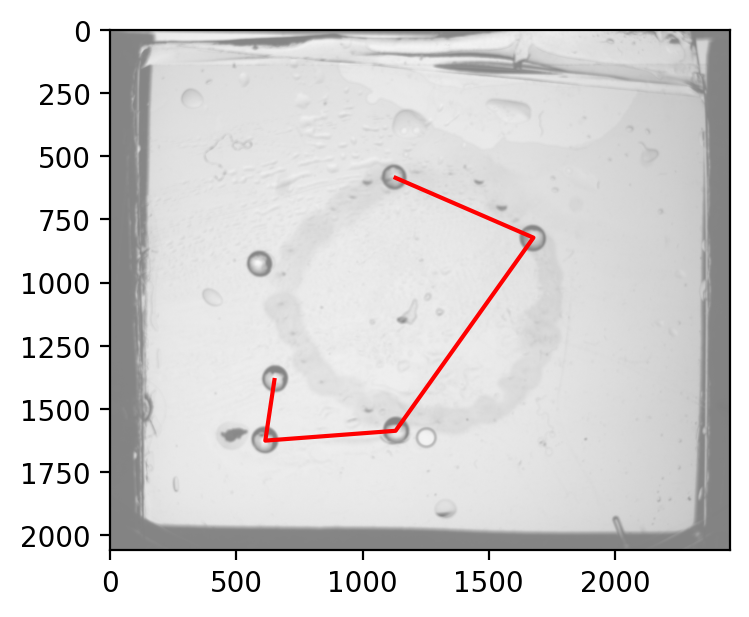

In [511]:
fig, ax = plt.subplots(figsize=(4,4), dpi=200)

ax.imshow(img1, cmap=plt.cm.gray, alpha=0.5)
ax.plot(src[:, 0], src[:, 1], 'r')

# Plotting the trajectory and the reference beads

6.88 -15.16
7.81 -10.23
-2.6 -10.24
-13.53 -25.75
-2.93 -31.01


(-35.0, -5.0)

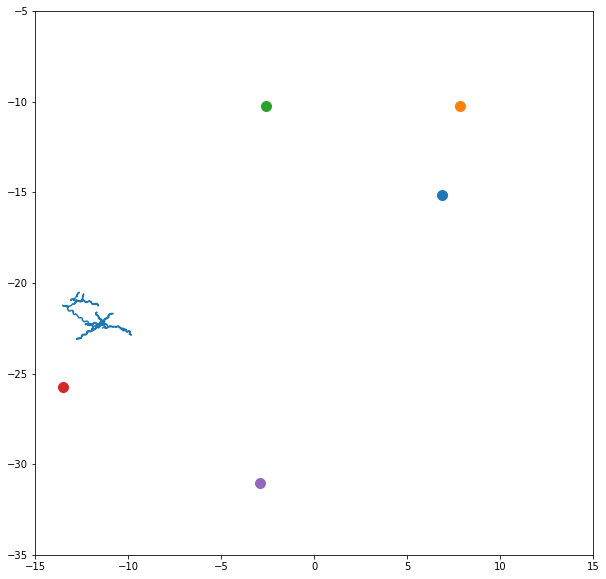

In [513]:
#this is not correct because it requires some of the data to be mirrored
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(stage_coords['X'], stage_coords['Y'])

for (x,y) in dst:
    print(x,y)
    ax.scatter(x, y, s=100)
    #plt.gca().add_artist(c1)
ax.set_xlim([-15, 15])
ax.set_ylim([-35, -5])

#    print(y)

6.88 -15.16
7.81 -10.23
-2.6 -10.24
-13.53 -25.75
-2.93 -31.01


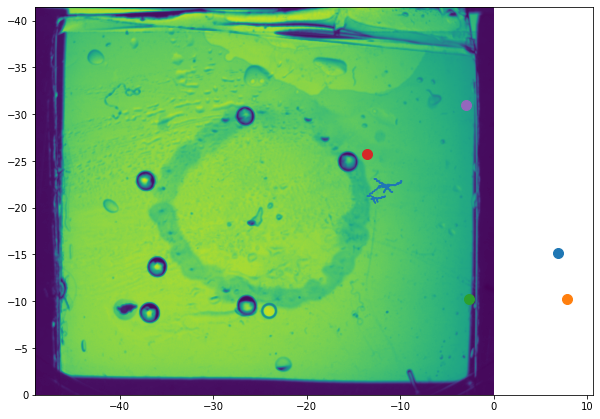

In [514]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(stage_coords['X'], stage_coords['Y'])
ax.imshow(img1,extent=[-49,0, 0., -41.5])
for (x,y) in dst:
    print(x,y)
    ax.scatter(x, y, s=100)
    #plt.gca().add_artist(c1)
#ax.set_xlim([-15, 15])
#ax.set_ylim([-35, -5])

In [277]:
from matplotlib.patches import Circle, Wedge, Polygon


In [359]:
polygon2=np.array([[1107.5,651.5],
[1059.5,677.5],
[1021.5,704.5],
[955.50,735.5],
[888.50,777.5],
[856.50,830.5],
[790.50,906.5],
[757.50,972.5],
[749.50,1010.5],
[710.50,1039.5],
[736.50,1073.5],
[768.50,1156.5],
[799.50,1235.5],
[871.50,1337.5],
[902.50,1376.5],
[933.50,1371.5],
[975.50,1383.5],
[1017.5,1447.5],
[1052.5,1431.5],
[1097.5,1433.5],
[1141.5,1473.5],
[1182.5,1495.5],
[1247.5,1492.5],
[1300.5,1494.5],
[1338.5,1497.5],
[1409.5,1498.5],
[1443.5,1481.5],
[1462.5,1453.5],
[1488.5,1448.5],
[1502.5,1458.5],
[1526.5,1472.5],
[1553.5,1449.5],
[1556.5,1423.5],
[1539.5,1409.5],
[1538.5,1384.5],
[1562.5,1376.5],
[1583.5,1370.5],
[1593.5,1342.5],
[1617.5,1312.5],
[1642.5,1282.5],
[1648.5,1257.5],
[1643.5,1206.5],
[1634.5,1148.5],
[1642.5,1117.5],
[1663.5,1095.5],
[1693.5,1061.5],
[1700.5,1001.5],
[1692.5,930.5],
[1659.5,882.5],
[1611.5,810.5],
[1566.5,766.5],
[1508.5,719.5],
[1483.5,686.5],
[1438.5,655.5],
[1307.5,606.5],
[1240.5,609.5],
[1173.5,618.5],
[1143.5,631.5]])

In [516]:
from scipy.spatial.transform import Rotation as R
polygon2_R=R.from_matrix(tform3.params)

In [544]:
src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = transform.SimilarityTransform()
tform3.estimate(src, dst)

True

In [545]:
tform3.params

array([[  0.66486486,  -0.32702703, 118.44594595],
       [  0.32702703,   0.66486486,   4.32432432],
       [  0.        ,   0.        ,   1.        ]])

In [519]:
tform3.params[0:3,0:3]

array([[-1.97791942e-02,  3.79872012e-04,  1.92598389e+01],
       [ 1.10180508e-03,  2.06820530e-02, -4.44682612e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [520]:
point

array([1143.5,  631.5])

In [521]:
(1143.5,631.5)*tform3.params[0:2,0:2].T

array([[-22.6175086 ,   0.69578991],
       [  0.43438365,  13.06071647]])

In [412]:
point*tform3.params[0:2,0:2]

array([[  1.85462294,   7.82680245],
       [-14.17252351,   1.02421897]])

In [404]:
transformed_polygon=[]
for point in polygon2:
    transformed_polygon.append(point*tform3.params[0:2,0:2])

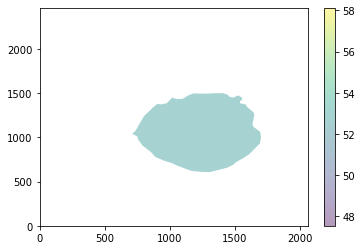

In [530]:
from matplotlib.collections import PatchCollection
fig, ax = plt.subplots()
patches=[]
N=3
#polygon = Polygon(np.random.rand(N, 2))
polygon=Polygon(polygon2)
patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
# ax.set_xlim([0, 0.005])
# ax.set_ylim([0, 0.005])
ax.set_xlim([0, 2058])
ax.set_ylim([0, 2456])
fig.colorbar(p, ax=ax)

plt.show()

(0.0, 2456.0)

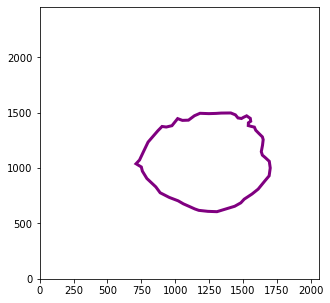

In [531]:
fig, ax = plt.subplots(figsize=(5,5))
ax.fill(polygon2[:,0], polygon2[:,1], facecolor='none', edgecolor='purple', linewidth=3)
ax.set_xlim([0, 2058])
ax.set_ylim([0, 2456])

651 1386
615 1626
1131 1587
1677 822
1131 585
6.88 -15.16
7.81 -10.23
-2.6 -10.24
-13.53 -25.75
-2.93 -31.01


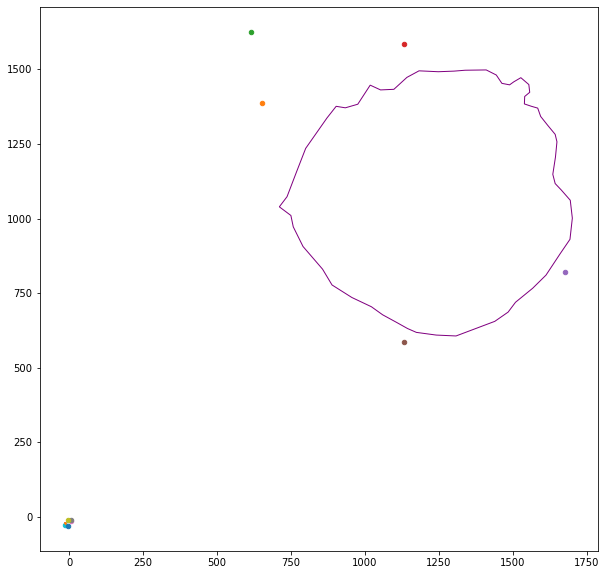

In [578]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(stage_coords['X'], stage_coords['Y'])
ax.fill(polygon2[:,0], polygon2[:,1], facecolor='none', edgecolor='purple', linewidth=1)
for (x,y) in src:
    print(x,y)
    ax.scatter(x, y, s=20)


for (x,y) in dst:
    print(x,y)
    ax.scatter(x, y, s=20)
ax.plot(stage_coords['X'], stage_coords['Y'])

651 1386
615 1626
1131 1587
1677 822
1131 585
6.88 -15.16
7.81 -10.23
-2.6 -10.24
-13.53 -25.75
-2.93 -31.01


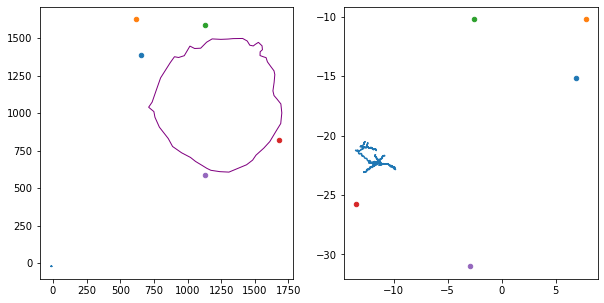

In [707]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))
for (x,y) in src:
    print(x,y)
    ax1.scatter(x, y, s=20)
ax1.plot(stage_coords['X'], stage_coords['Y'])
ax1.fill(polygon2[:,0], polygon2[:,1], facecolor='none', edgecolor='purple', linewidth=1)


for (x,y) in dst:
    print(x,y)
    ax2.scatter(x, y, s=20)
ax2.plot(stage_coords['X'], stage_coords['Y'])

6.88 -15.16
7.81 -10.23
-2.6 -10.24
-13.53 -25.75
-2.93 -31.01


(-47.47646861425561, 10.44268898163122, -64.878217097192, 20.31422673504019)

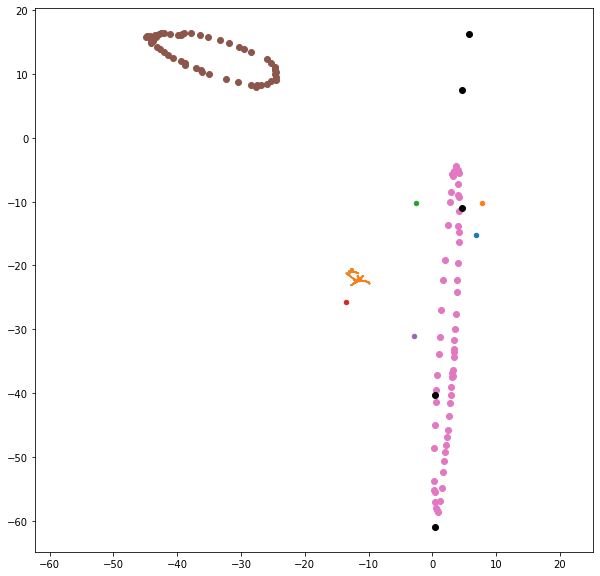

In [729]:

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(stage_coords['X'], stage_coords['Y'])
#ax.fill(polygon2[:,0], polygon2[:,1], facecolor='none', edgecolor='purple', linewidth=1)
# for (x,y) in src:
#     print(x,y)
#     ax.scatter(x, y, s=20)


for (x,y) in dst:
    print(x,y)
    ax.scatter(x, y, s=20)
ax.plot(stage_coords['X'], stage_coords['Y'])
ax.scatter(sol[0], sol[1])
ax.scatter(sol3_p[0], sol3_p[1])
ax.plot(sol3[0], sol3[1], 'ko')
ax.axis('equal')

In [533]:
r = R.from_matrix([

[0, -1, 0],

[1, 0, 0],

[0, 0, 1]])

In [537]:
r.as_matrix()

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [541]:
a = np.array([
[0, -0.5, 0],
[0.5, 0, 0],
[0, 0, 0.5]])


r = R.from_matrix(a)

matrix = r.as_matrix()

matrix


array([[-0.38461538, -0.92307692,  0.        ],
       [ 0.92307692, -0.38461538,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [543]:
r.as_matrix()

array([[-0.38461538, -0.92307692,  0.        ],
       [ 0.92307692, -0.38461538,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

## Trying to Manually understand the Matrix Transformation from this examples
https://mmas.github.io/linear-transformations-numpy

In [546]:
def linear_transformation(src, a):
    M, N = src.shape
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    new_points = np.linalg.inv(a).dot(points).round().astype(int)
    x, y = new_points.reshape((2, M, N), order='F')
    indices = x + N*y
    return np.take(src, indices, mode='wrap')

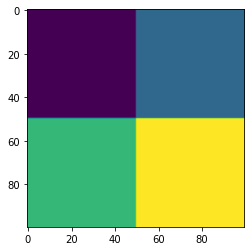

In [573]:
aux = np.ones((50, 50), dtype=int)
src = np.vstack([np.c_[aux, 2*aux], np.c_[3*aux, 4*aux]])
plt.imshow(src)
plt.show()

In [559]:
src

array([[1, 1, 2, 2],
       [1, 1, 2, 2],
       [3, 3, 4, 4],
       [3, 3, 4, 4]])

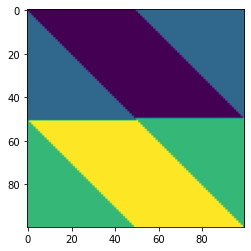

In [574]:
a = np.array([[1, 1],
              [0, 1]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

In [570]:
dst

array([[1, 1, 2, 2],
       [2, 1, 1, 2],
       [2, 2, 3, 3],
       [3, 4, 4, 3]])

In [563]:
dst

array([[1, 1, 1, 2],
       [1, 1, 1, 2],
       [3, 3, 3, 4],
       [3, 3, 3, 4]])

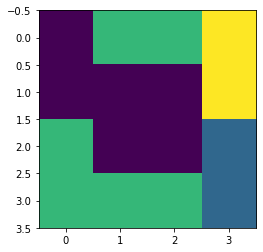

In [567]:
a = np.array([[1.5, 0],
              [1, 1]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

In [568]:
dst

array([[1, 3, 3, 4],
       [1, 1, 1, 4],
       [3, 1, 1, 2],
       [3, 3, 3, 2]])

In [579]:
#
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Create a grid of points in x-y space 
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])

# Apply linear transform
a = np.column_stack([[2, 1], [-1, 1]])
print(a)
uvgrid = np.dot(a, xygrid)

[[ 2 -1]
 [ 1  1]]


In [580]:
uvgrid

array([[ -5.,  -6.,  -7.,  -8.,  -9., -10., -11.,  -3.,  -4.,  -5.,  -6.,
         -7.,  -8.,  -9.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,   1.,
          0.,  -1.,  -2.,  -3.,  -4.,  -5.,   3.,   2.,   1.,   0.,  -1.,
         -2.,  -3.,   5.,   4.,   3.,   2.,   1.,   0.,  -1.,   7.,   6.,
          5.,   4.,   3.,   2.,   1.,   9.,   8.,   7.,   6.,   5.,   4.,
          3.,  11.,  10.,   9.,   8.,   7.,   6.,   5.],
       [ -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,  -6.,  -5.,  -4.,  -3.,
         -2.,  -1.,   0.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,  -4.,
         -3.,  -2.,  -1.,   0.,   1.,   2.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   0.,   1.,   2.,   3.,   4.,   5.,
          6.,   1.,   2.,   3.,   4.,   5.,   6.,   7.]])

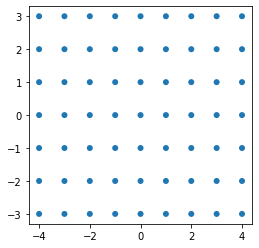

In [582]:
plt.figure(figsize=(4, 4), facecolor="w")
plt.scatter(xygrid[0], xygrid[1], s=36, edgecolor="none")

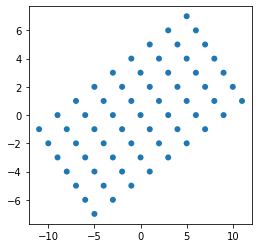

In [583]:
plt.figure(figsize=(4, 4), facecolor="w")
plt.scatter(uvgrid[0], uvgrid[1], s=36, edgecolor="none")

In [589]:
(k_inferred, m0_inferred), residuals, rank, s=np.linalg.lstsq(uvgrid,xygrid)

<ipython-input-589-8d2749a0899e>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (k_inferred, m0_inferred), residuals, rank, s=np.linalg.lstsq(uvgrid,xygrid)


ValueError: too many values to unpack (expected 2)

In [587]:
a

(array([[ 0.03015873,  0.01904762,  0.00793651, ..., -0.00793651,
         -0.01904762, -0.03015873],
        [ 0.02751323,  0.01904762,  0.01058201, ..., -0.01058201,
         -0.01904762, -0.02751323],
        [ 0.02486772,  0.01904762,  0.01322751, ..., -0.01322751,
         -0.01904762, -0.02486772],
        ...,
        [-0.02486772, -0.01904762, -0.01322751, ...,  0.01322751,
          0.01904762,  0.02486772],
        [-0.02751323, -0.01904762, -0.01058201, ...,  0.01058201,
          0.01904762,  0.02751323],
        [-0.03015873, -0.01904762, -0.00793651, ...,  0.00793651,
          0.01904762,  0.03015873]]),
 array([], dtype=float64),
 2,
 array([46.51631918, 20.9817075 ]))

In [588]:
uvgrid = np.dot(a, xygrid)

ValueError: setting an array element with a sequence.

In [590]:
import numpy as np
A = np.random.random(5)
R = np.column_stack([A,np.ones(len(A))]) 
k = np.random.random()
m0 = np.random.random()
M = R.dot([k,m0])

(k_inferred, m0_inferred), residuals, rank, s = np.linalg.lstsq(R, M)

assert np.allclose(m0, m0_inferred)
assert np.allclose(k, k_inferred)

<ipython-input-590-277cab59f734>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (k_inferred, m0_inferred), residuals, rank, s = np.linalg.lstsq(R, M)


In [591]:
(k_inferred, m0_inferred)

(0.3141786107198257, 0.8275696647750969)